# Housing Prices: Advanced Regression Techniques
***

<img src='../images/House_Prices.gif'></img>

The House Prices are relied heavily on what house buyers are looking for. Its hard to draw up a generic conclusion on which features essentially influences the House Prices. In this notebook, I intend to use Machine Learning models to derive the essential features which are the deciding factors for the House Prices. I also built predictive models to predict the House Prices.
<br><br>
Also, this notebook is special, cause this is my first ene-to-end Machine Learning project. And I made it to <b> top 16% of the Leaderboard </b> on Kaggle.
<br><br>
<i><b>Acknowledgement</b>
<br>
- The <a href = 'http://jse.amstat.org/v19n3/decock.pdf'>Ames Housing dataset</a> was compiled by Dean De Cock.
- Kernels I sought out help from:
    - <a href="https://www.kaggle.com/dgawlik/house-prices-eda">For EDA</a>
    - <a href="https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard">The idea of Stacking</a>
    - <a href="https://www.kaggle.com/laurenstc/top-2-of-leaderboard-advanced-fe">For Feature Engineering</a>
</i>

## Table Of Contents
***
### Objective
- [Goal of the notebook](#objective)
### Data Quality Check
- [Simple Inspection of Data](#inspection)
### Descriptive Statistics
- [Explore Data](#eda)
- [Univariate Analysis](#univariateAnalysis)
- [Bivariate Values](#bivariateAnalysis)
### Data Preprocessing
- [Missing Values](#missingValues)
- [Imputation](#imputation)
- [Encoding](#encoding)
- [Data Cleansing](#cleansing)
- [Feature Engineering](#newFeatures)
- [Correlation](#correlation)
- [Deletion](#deletion)
### Modelling
- [Define a cross validation strategy](#cvStrategy)
- [Base Models](#baseModels)
    - [Linear Regression](#linearRegression)
    - [Polynomial Regression](#polynomialRegression)
    - [Ridge Regression](#ridgeRegression)
    - [Lasso Regression](#lassoRegression)
    - [Elastic Net Regression](#elasticNetRegression)
    - [Decision Tree Regression](#decisionTreeRegression)
    - [Random Forest Regression](#randomForestRegression)
    - [Gradient Boosting Regression](#gradientBoost)
    - [XG Boost Regression](#xgb)
    - [LGBM Regression](#lgbm)
- [Save Models to file](#saveModels)
- [RMSLE Scores](#rmsle)
- [Feature Importance](#featureImportance)
- [Averaging Scores](#averageing)
- [Stacked Generalization](#stacking)
### Conclusion

<a id = 'objective'></a>
# Objective:
***
- To build a predictive model to predict Housing Prices.
- To understand what factors contribute more to the Housing Prices.

# Import Packages
***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

%matplotlib inline

# Read the data
***

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

<a id = 'inspection'></a>
# Data Quality Check
***

In [3]:
# Examine the train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Examine the test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Check the type of our features. Are there any data inconsistencies?
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
# Can you check to see if there are any missing values in our data set
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [7]:
# Feature 'MSSubClass' has numerical value, but it is a nominal data. So, converting it to categorical data
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

In [8]:
# concatenating the data
all_data = pd.concat((train.drop(['Id', 'SalePrice'], axis = 1),
                      test.drop(['Id'], axis = 1))).reset_index(drop=True)

In [9]:
# What is the size of the training set?
train.shape

(1460, 81)

In [10]:
# What is the size of the test set?
test.shape

(1459, 80)

<a id = 'eda'></a>
# Exploratory Data Analysis
***
<img src='../images/explore_.gif'/>

In [11]:
# Display the statistical overview of the numerical attributes of houses
all_data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<b>Observations:</b>
- The max value "LotFrontage"is 313, while its median ad third quartile are 68 and 80. There could be one/few outliers.
- The max value "LotArea" is 215245, while its median and third quartile are 9453 and 11570. There could be one/few outliers.
- The max value of "BsmtFinSF1" is 5644, while the third quartile is just 733. The value "5644" could be an outlier.
- The max value of "TotalBsmtSF" is 6110, while the median and third quartile is just 989 and 1302. The value "6110" could be an outlier.
- The max value of "GarageYrBlt" is 2207. Clearly, 2207 is an outlier.

In [12]:
# Display the statistical overview of the Sale Prices of the houses
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
# Display the statistical overview of the categorical attributes of houses
all_data.describe(include = 'object')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,16,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1079,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [14]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

<a id='univariateAnalysis'></a>
## Univariate Analysis
***

### Target variable: Sale Price
***

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


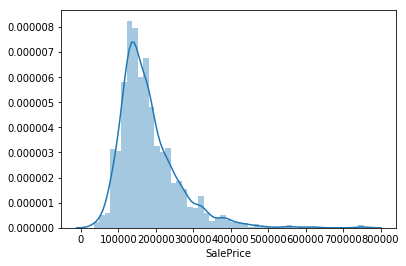

In [15]:
#histogram
sns.distplot(train['SalePrice'])

The graph of SalePrice is slightly deviated from normal distribution. Let's verify the normality of curve.

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180921.20 and sigma = 79415.29



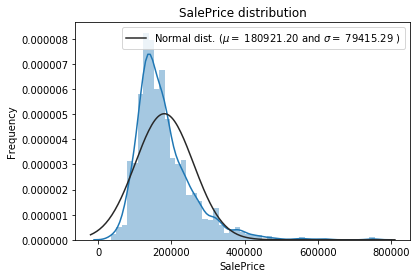

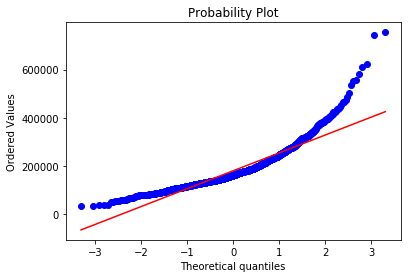

In [16]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The graph is positively skewed and too far from normal distribution. Let us make log transformation to make it normally distributed. Following are the benefits of having normally distributed target variable:
- The linear models tend to work better with normally distributed data.
- Submissions of the competitions are evaluated on Root-Mean-Squared-Error (RMSE) between the <b>logarithm</b> of the predicted value and the <b>logarithm</b> of the observed sales price. So, once transformation is done, we can evaluate the RMSE of our models locally. Easy peasy!

### Log transformation of Sale Price
***

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12.02 and sigma = 0.40



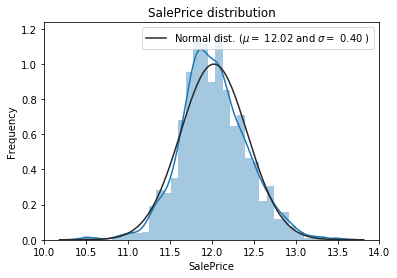

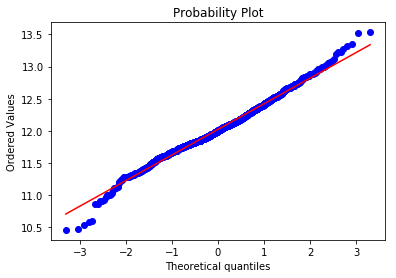

In [17]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Numerical Attributes
***

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


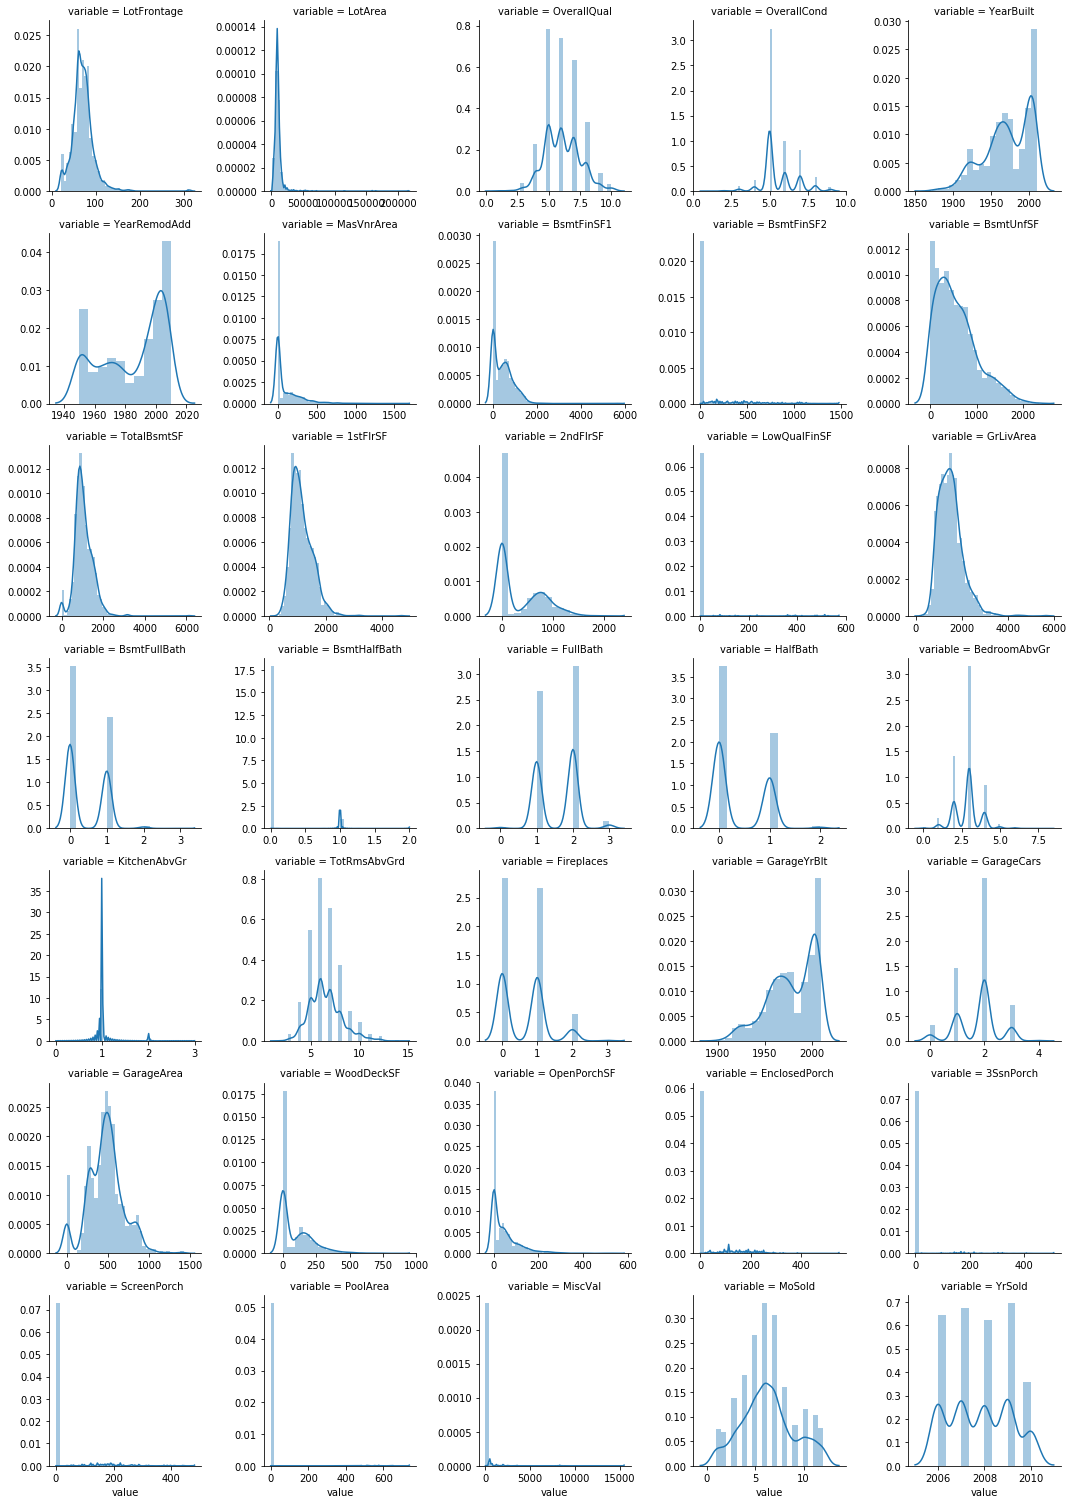

In [18]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

<b><i>Observations</i></b>
- Only 0.45% of houses have Pool.
- Only 1.64% of houses have 3SsnPorch.
- Only 1.78% of houses have Low Quality Finishing of floor.
- Only 2.19% of houses have Lot Area greater than 25000. The max value of Lot Area ranges above 200000. This is the reason the plot below 25000 is a bit obscure.
- Only 3.56% of houses have Miscellaneous values.
- Only 4.58% of houses have more than 1 Kitchen
- Only 8% of houses have ScreenPorch.
- Only 11.43% of houses have Type 2 finished Basement surface
- Only 14% of houses have Enclosed Porch
- 41% of houses have Masonry Veneer
- 68% of houses have Type 1 finished Basement surface

<a id='bivariateAnalysis'></a>
## Bivariate Analysis
***

### Numerical Attributes
***

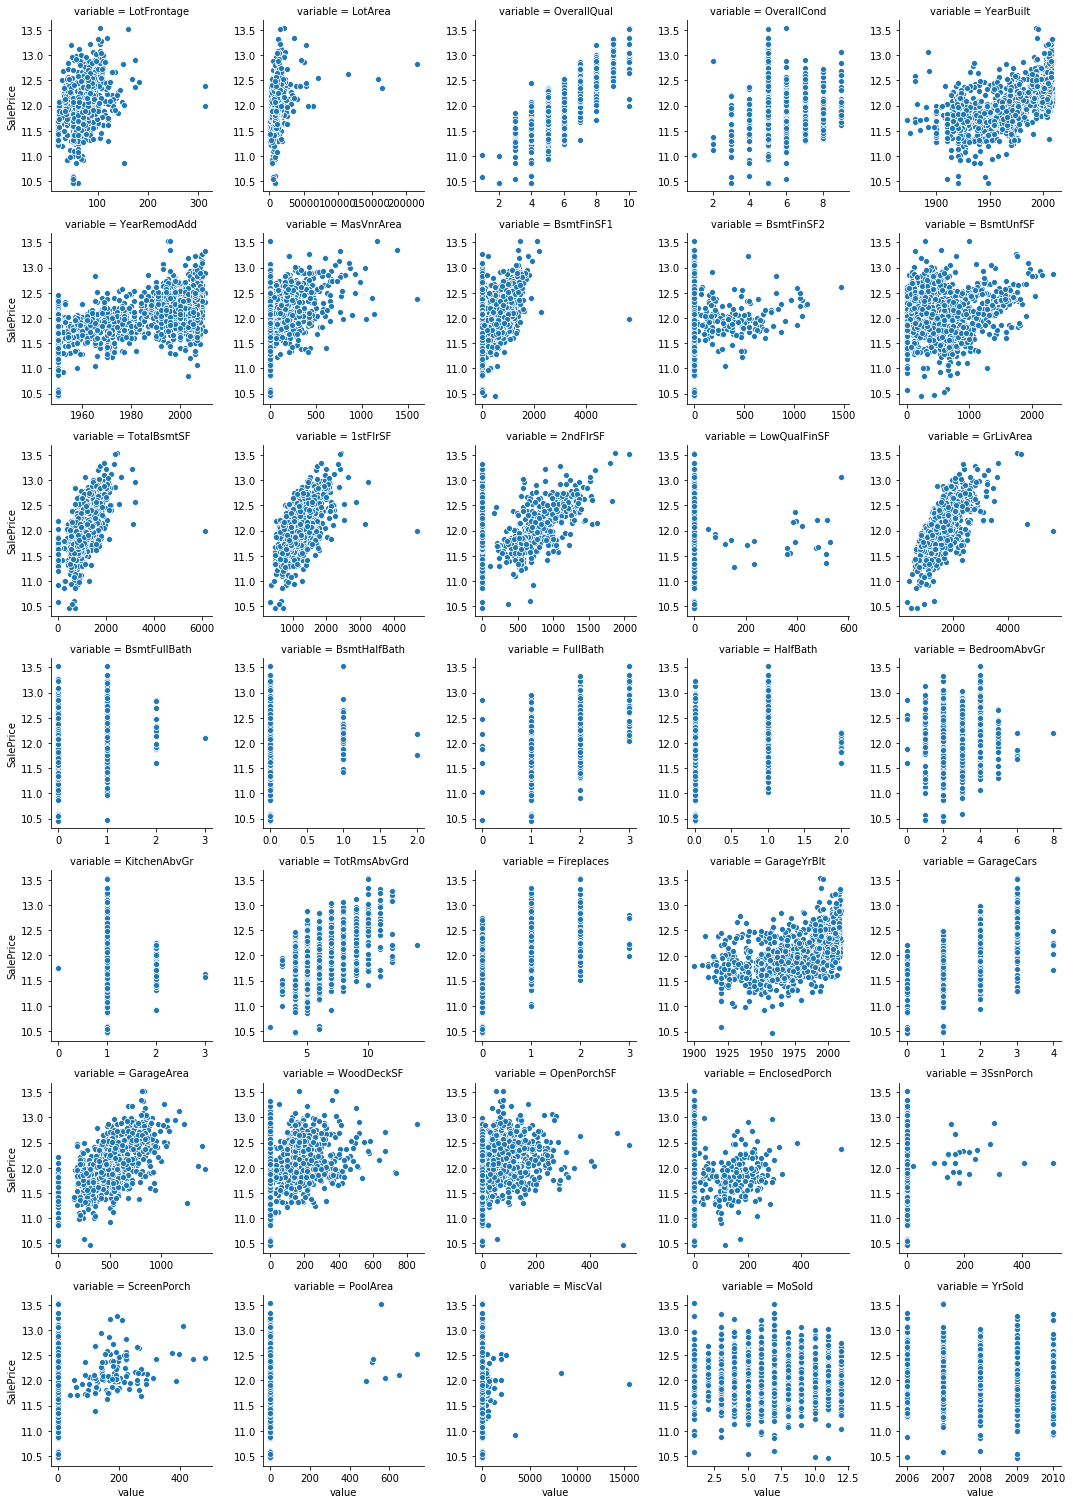

In [19]:
def scatterplot(x, y, **kwargs):
    sns.scatterplot(x=x, y=y)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(scatterplot, "value", "SalePrice")

<b><i>Observations</i></b>
- "OverallQual", "TotalBsmtSF", "1stFlrSF" and "GrLivArea" are strongly positively correlated to "SalePrice".
- The "YrBuilt", "YrRemodAdd" and "MasVnrArea" are weakly correlated to "SalePrice".
- "FullBath" seems to have better correlation to "SalePrice", in comparison to "HalfBath", "BsmtFullBath" and "BsmtHalfBath".
- While "TotalRmsAbvGrd" is positively correlated to "SalePrice", strangely "BedroomAbvGrd" does not seem to have significant affect on "SalePrice".
- There is an outlier that can be seen in plot GrLivArea-SalePrice, TotalBsmtSF-SalePrice, BsmtFinSF1-SalePrice and 1stFlrSF-SalePrice. The area of the house is greater than 4000, but the SalePrice is low.
- As identified earlier as well, there are two values of "LotFrontage" that are higher than 300, while rest of the values are below 180. We are not sure if they are indeed outlier. It would be wise to test the performance of the model with them and without them and see what performs better.
- Also, there is a "LotArea" which has a value above 200000. Like previous case, we are not sure if its an outlier.
- The houses with "Pool" constitute the upper half of Sale Prices.
- "YrSold" and "MoSold" don't seem to have impact on Sale Prices.

### Categorical Attributes
***

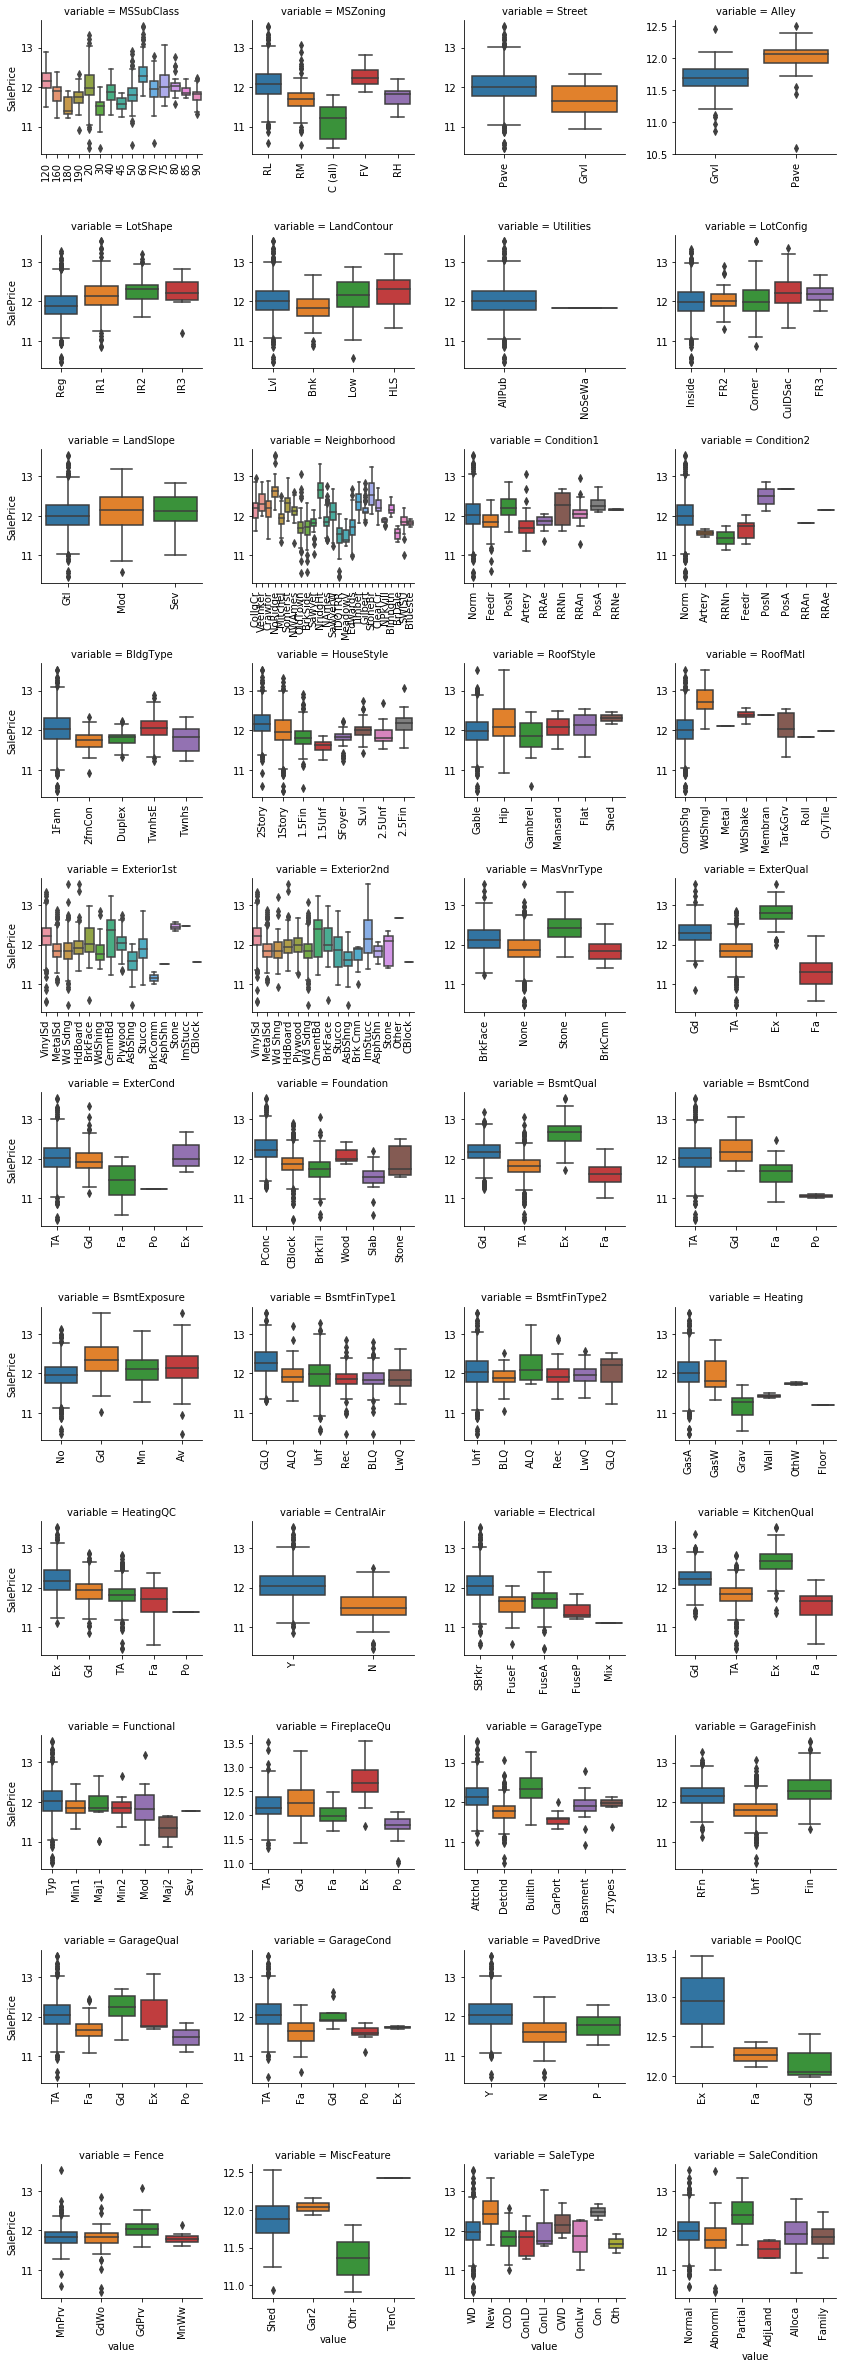

In [20]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")

# Data Preprocessing
***
<img src='../images/preprocess.gif'/>

<a id='missingValues'></a>
## Missing Values
***

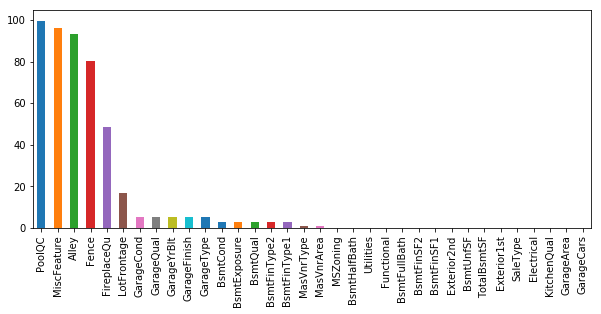

In [21]:
missing_total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() * 100/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent'] > 0]['Percent'].plot.bar(by = 'Percent', figsize=(10,4))

<a id='imputation'></a>
## Imputation
***

In [22]:
# All columns where missing values can be replaced with 'None'
for col in ('PoolQC', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'MasVnrType', 'BsmtQual', 'BsmtCond', 
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MSSubClass', 'MiscFeature', 'Utilities'):
    all_data[col] = all_data[col].fillna("None")

In [23]:
# All columns where missing values can be replaced with 0
for col in ('GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

In [24]:
# Imputing GarageYrBlt with value from"YearBuilt"
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['YearBuilt'])

In [25]:
# All columns where missing values can be replaced with the mode (most frequently occurring value)
for col in ('MSZoning', 'Electrical', 'KitchenQual','Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [26]:
# Imputing LotFrontage with the median (middle) value
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [27]:
# Imputing Functional with "Typ"
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [28]:
# Updating imputed values in train and test set
ntrain = train.shape[0]
ntest = test.shape[0]

train_id = train['Id']
test_id = test['Id']
label = train['SalePrice']

train = all_data[:ntrain]
train['SalePrice'] = label
train['Id'] = train_id
test = all_data[ntrain:].reset_index().drop(['index'], axis = 1)
test['Id'] = test_id

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


<a id='encoding'></a>
## Encoding
***
Encoding qualitative variables according to ordering based on mean of SalePrice.

In [29]:
def encode(train_frame, all_data_frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = train_frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = train_frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        all_data_frame.loc[all_data_frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, all_data, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSSubClass_E', 'MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [30]:
# The imputed "None" value in few columns did not exists in train set 
# but existed on test set, so the "None" didn't get encoded
all_data.loc[2818, 'MSSubClass_E'] = 16
all_data.loc[1915, 'Utilities_E'] = 3
all_data.loc[1945, 'Utilities_E'] = 3

In [31]:
# Updating train and test set with encoded attributes
train = all_data[:ntrain]
train['SalePrice'] = label
train['Id'] = train_id
test = all_data[ntrain:].reset_index().drop(['index'], axis = 1)
test['Id'] = test_id

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<a id='cleansing'></a>
## Data Cleansing
***
<img src='../images/cleanse.gif'/>

### Remove Outliers
***
- With context to previous observation - There is an outlier that can be seen in plot GrLivArea-SalePrice, TotalBsmtSF-SalePrice, BsmtFinSF1-SalePrice and 1stFlrSF-SalePrice. The area of the house is greater than 4000, but the SalePrice is low.

In [32]:
train = train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<12.5)].index).reset_index()

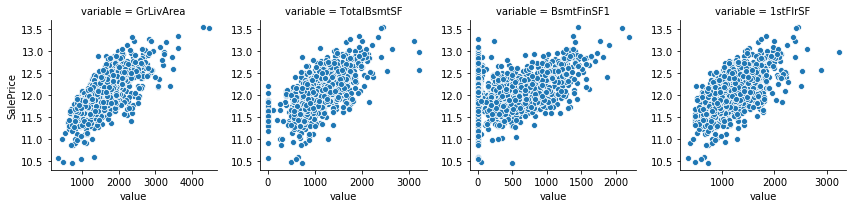

In [33]:
# Verifying if the outlier is gone
def scatterplot(x, y, **kwargs):
    sns.scatterplot(x=x, y=y)
    
quantVar = ['GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF']
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantVar)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(scatterplot, "value", "SalePrice")

### Rectify incorrect data
***

In [34]:
test[test['GarageYrBlt'] == 2207]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSSubClass_E,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,RoofStyle_E,RoofMatl_E,Exterior1st_E,Exterior2nd_E,MasVnrType_E,ExterQual_E,ExterCond_E,Foundation_E,BsmtQual_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E,Id
1132,20,RL,68.0,8298,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,...,0,9,2007,New,Partial,12.0,4.0,2.0,3.0,2.0,4.0,2.0,1.0,1.0,22.0,4.0,5.0,4.0,5.0,5.0,3.0,13.0,14.0,2.0,3.0,4.0,6.0,4.0,4.0,4.0,7.0,6.0,6.0,5.0,2.0,5.0,4.0,7.0,5.0,6.0,3.0,4.0,6.0,3.0,1.0,5.0,3.0,8.0,6.0,2593


This particular datapoint has YearBuilt in 2006 and YearRemodAdd in 2007. 2207 most likely is a data input error that should have been 2007 when the remodel happened. Let's impute 2007.

In [35]:
test.loc[1132, 'GarageYrBlt'] = 2007

<a id='newFeatures'></a>
## Feature Engineering
***

In [36]:
# concatenating the data
all_data = pd.concat((train.drop(['Id', 'SalePrice'], axis = 1),
                      test.drop(['Id'], axis = 1))).reset_index(drop=True)

ntrain = train.shape[0]
ntest = test.shape[0]

train_id = train['Id']
test_id = test['Id']
label = train['SalePrice']

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In this section I create some features that can be created from the current data. 

Size of the house. We combine TotalBsmtSF, 1stFlrSF and 2ndFlrSF to get the measure of size of the house.
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF

Another combined variable is the bathrooms in the house. I count fullbath for 1 and halfbath for 0.5.
- FullBath
- HalfBath
- BsmtFullBath
- BsmtHalfBath

Another combined variable is the total porch size.
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- Screenporch
- WoodDeckSF

Next to that I make some simplified features.
- haspool
- has2ndfloor
- hasgarage
- hasbsmt
- hasfireplace
- hasMasVnr

In [37]:
all_data['Total_sqr_footage'] = (all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + 
                                   all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5*all_data['HalfBath']) + 
                               all_data['BsmtFullBath'] + (0.5*all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                             all_data['WoodDeckSF'])


#simplified features
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasMasVnr'] = all_data['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)

quantitative = quantitative + ['Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf']
qual_encoded = qual_encoded + ['haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace', 'hasMasVnr']

In [38]:
# update train and test set with new features
train = all_data[:ntrain]
train['SalePrice'] = label
train['Id'] = train_id
test = all_data[ntrain:].reset_index()
test['Id'] = test_id

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<a id='correlation'></a>
# Correlation
***
Now that we have a lot of ordinal variables, it is better to use Spearman Correlation. For the record, spearman correlation works better with variables, even when they do not have linear relation between them.

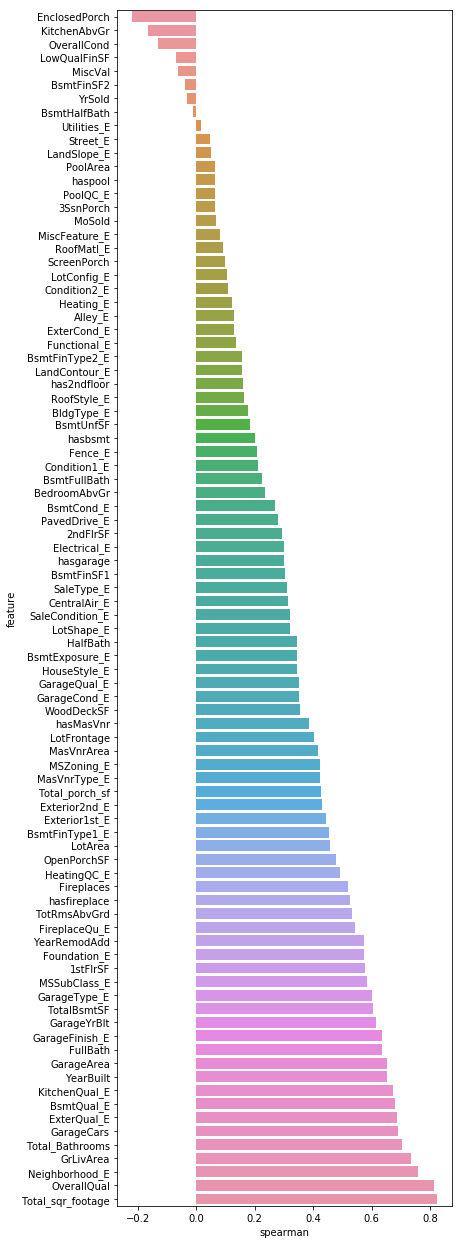

In [39]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

- Total_sqr_footage and Total_bathrooms are the ones we created and its among the features with highest correlation.

## Heatmap
***

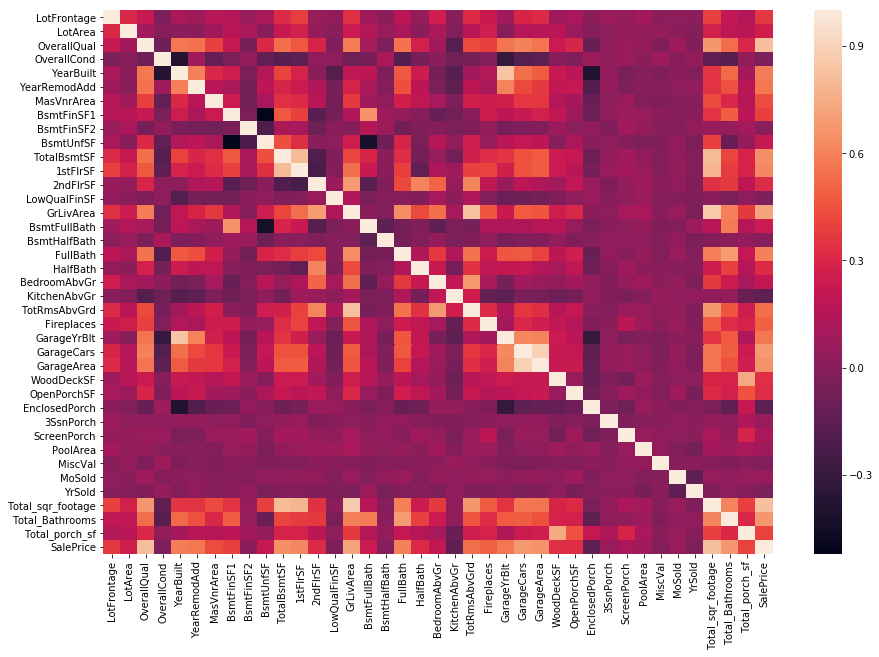

In [40]:
plt.subplots(figsize=(16,12))
corr = train[quantitative+['SalePrice']].corr()
sns.heatmap(corr, xticklabels=True, yticklabels=True)

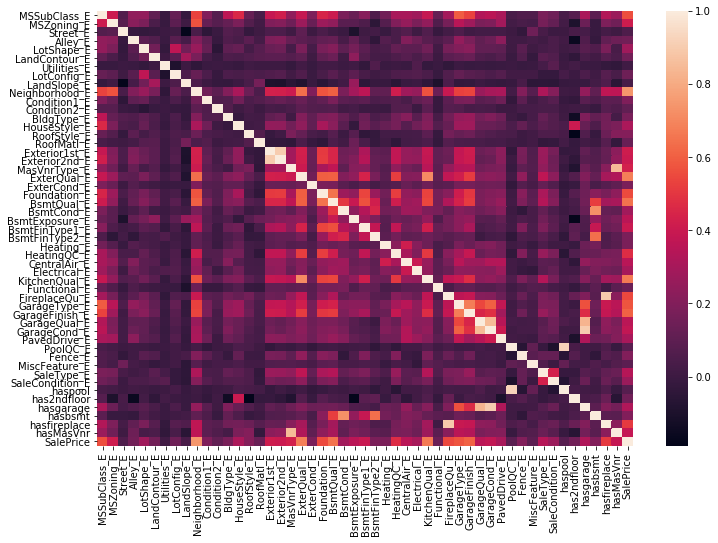

In [41]:
plt.subplots(figsize=(16,12))
corr = train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr, xticklabels=True, yticklabels=True)

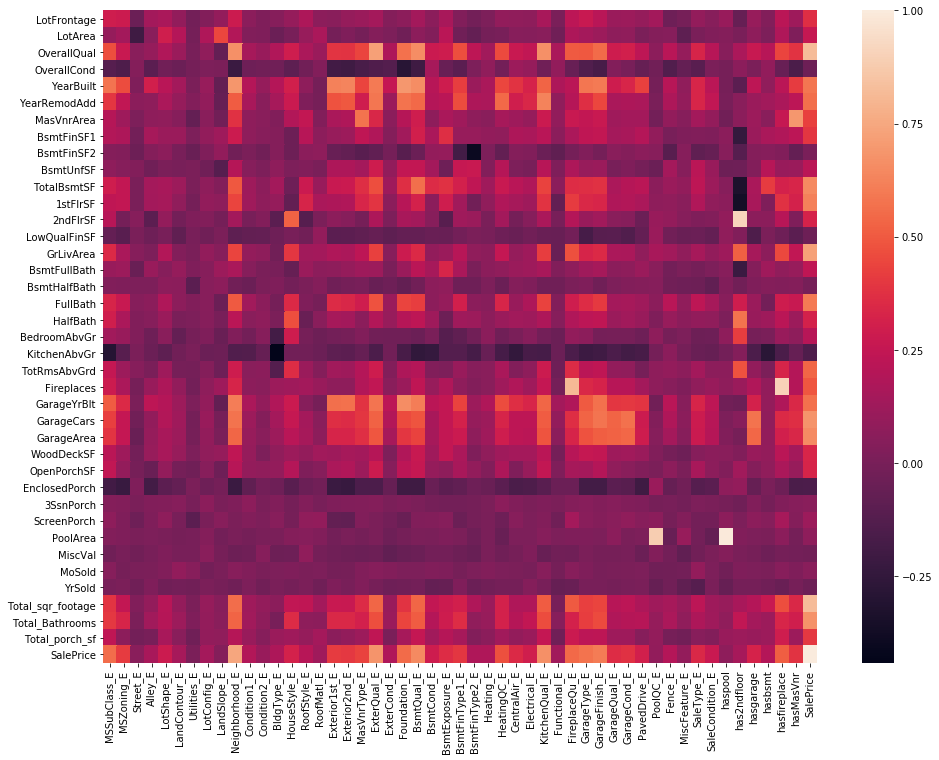

In [42]:
plt.subplots(figsize=(16,12))
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr, xticklabels=True, yticklabels=True)

<b>Observations</b>
- "1stFlrSF" is highly correlated with "TotalBSMTSF". This is supposedly because the square feet area of first floor will mostly be equal to area of basement.
- "GarageCars" is highly correlated with "GarageArea".
- "GarageYrBlt" is highly correlated with "YearBuilt".
- "GrLivArea" is highly correlated with "TotRmsAbvGrd"

<a id='deletion'></a>
# Deletion
***
Deleting few features based on their low correlation and my intution

In [43]:
to_delete_features = ('LowQualFinSF','MiscVal','BsmtFinSF2','YrSold','BsmtHalfBath',
                      'PoolArea','haspool','3SsnPorch','MoSold','ScreenPorch','LotConfig_E',
                      'Condition2_E', 'GarageArea','Street_E','LandSlope_E', 'PoolQC_E',
                      'MiscFeature_E','RoofMatl_E','Heating_E','Alley_E','ExterCond_E','Functional_E', 'Utilities_E')

quantitative = [e for e in quantitative if e not in to_delete_features]
qual_encoded = [e for e in qual_encoded if e not in to_delete_features]

In [44]:
y_train = train['SalePrice']
train_id = train['Id']

In [45]:
train[quantitative+qual_encoded].shape

(1458, 65)

# Modelling
***

In [46]:
# import libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

<a id='baseModels'></a>
## Base Models
***

<a id='cvStrategy'></a>
### Define a cross-validation strategy
***
We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [47]:
#Validation function
n_folds = 5

def rmsle_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

<a id='linearRegression'></a>
## Linear Regression
***

In [48]:
lin_reg = make_pipeline(RobustScaler(), LinearRegression())
lin_reg.fit(train[quantitative + qual_encoded], y_train)

# score
lin_reg.score(train[quantitative + qual_encoded], y_train)

0.9261841834560207

<a id='polynomialRegression'></a>
## Polynomial Regression
***

In [49]:
# 2nd degree order
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(train[quantitative + qual_encoded])

poly_reg = make_pipeline(RobustScaler(), LinearRegression())

poly_reg.fit(X_poly, y_train)

# score
poly_reg.score(X_poly, y_train)

0.9999932427435106

<a id='ridgeRegression'></a>
## Ridge Regression
***

In [50]:
# Hyperparameter Tuning
alphas = [0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]
ridge_reg = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_reg.fit(train[quantitative + qual_encoded], y_train)

cv_mse = np.mean(ridge_reg.cv_values_, axis=0)
print("alphas: %s" % alphas)
print("CV MSE: %s" % cv_mse)
print("Best alpha using built-in RidgeCV: %f" % ridge_reg.alpha_)

alphas: [0.1, 1, 10, 100, 1000.0, 10000.0, 20000.0, 50000.0, 80000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0]
CV MSE: [0.01321836 0.0132094  0.01321232 0.01329458 0.01470612 0.02003501
 0.02164094 0.02351088 0.02432254 0.02467045 0.02917912 0.04019442
 0.04680232]
Best alpha using built-in RidgeCV: 1.000000


In [51]:
# continued Hyperparameter tuning
alphas = [1, 2, 3, 4, 5, 6,7, 8, 9, 10, 11]
ridge_reg = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_reg.fit(train[quantitative + qual_encoded], y_train)

cv_mse = np.mean(ridge_reg.cv_values_, axis=0)
print("alphas: %s" % alphas)
print("CV MSE: %s" % cv_mse)
print("Best alpha using built-in RidgeCV: %f" % ridge_reg.alpha_)

alphas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
CV MSE: [0.0132094  0.01320498 0.01320358 0.01320373 0.01320468 0.01320604
 0.01320757 0.01320917 0.01321076 0.01321232 0.01321381]
Best alpha using built-in RidgeCV: 3.000000


In [52]:
ridge_reg = make_pipeline(StandardScaler(), Ridge(alpha = 3))
ridge_reg.fit(train[quantitative + qual_encoded], y_train)

# score
ridge_reg.score(train[quantitative + qual_encoded], y_train)

/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/bishwaraj/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.926178991198919

<a id='lassoRegression'></a>
## Lasso Regression
***

In [53]:
# Hyperparameter tuning
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

alphas = [0.00005, 0.0001, 0.0004, 0.0005, 0.0006]

grid_search = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas), 
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train[quantitative+qual_encoded], y_train)

print(grid_search.best_params_, grid_search.best_score_)

{'alpha': 0.0004} -0.013374378910394134


In [54]:
lasso_reg = make_pipeline(StandardScaler(), Lasso(alpha = 0.0004))
lasso_reg.fit(train[quantitative+qual_encoded], y_train)

# score
lasso_reg.score(train[quantitative+qual_encoded], y_train)

0.9259795303291583

<a id='elasticNetRegression'></a>
## Elastic Net Regression
***

In [55]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0003, l1_ratio=.9, random_state=3))
ENet.fit(train[quantitative+qual_encoded], y_train)

# score
ENet.score(train[quantitative+qual_encoded], y_train)

0.9258207761899878

<a id='decisionTreeRegression'></a>
## Decision Tree Regressor
***

In [56]:
# Hyperparameter tuning
depth = [3,4,5,6]

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dict(max_depth=depth), 
                           cv=10, scoring='neg_mean_squared_error')
grid_search.fit(train[quantitative+qual_encoded],y_train)

print(grid_search.best_params_, grid_search.best_score_)

{'max_depth': 5} -0.030813948259501324


In [57]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(train[quantitative+qual_encoded],y_train)

# score
tree_reg.score(train[quantitative+qual_encoded],y_train)

0.8676086338946497

<a id='randomForestRegression'></a>
## Random Forest Regressor
***

In [58]:
# Hyperparameter Tuning
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100, 200, 400], 'max_features': [12, 14, 16]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train[quantitative+qual_encoded], y_train)

print(grid_search.best_params_, grid_search.best_score_)

{'max_features': 14, 'n_estimators': 200} -0.01599787196735047


In [59]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=14, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [60]:
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=14, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

forest_reg.fit(train[quantitative+qual_encoded],y_train)

# score
forest_reg.score(train[quantitative+qual_encoded],y_train)

0.9862324751882976

<a id='gradientBoost'></a>
## Gradient Boost Regression
***

In [61]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

GBoost.fit(train[quantitative+qual_encoded],y_train)

# score
GBoost.score(train[quantitative+qual_encoded],y_train)

0.987482833922213

<a id='xgb'></a>
## XG Boost
***

In [62]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(train[quantitative+qual_encoded],y_train)

# score
model_xgb.score(train[quantitative+qual_encoded],y_train)

0.9601401432919735

<a id='lgbm'></a>
## Light GBM
***

In [63]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(train[quantitative+qual_encoded],y_train)

# score
model_lgb.score(train[quantitative+qual_encoded],y_train)

0.9667701375555257

<a id='saveModels'></a>
## Save Models to file
***

In [64]:
import pickle

modelList = [(lin_reg, 'LinearRegression.sav'),
            (poly_reg, 'PolynomialRegression.sav'),
            (ridge_reg, 'RidgeRegression.sav'),
            (lasso_reg, 'LassoRegression.sav'),
            (ENet, 'ElasticNet.sav'),
            (tree_reg, 'DecisionTree.sav'),
            (forest_reg, 'RandomForest.sav'),
            (GBoost, 'GradientBoost.sav'),
            (model_xgb, 'XGBoost.sav'),
            (model_lgb, 'LightGBM.sav')]

for model, filename in modelList:
    pickle.dump(model, open("../models/"+filename, 'wb'))

<a id='rmsle'></a>
## RMSLE Scores
***
We use cross validation mechanism to see how our model performs.

In [65]:
# Linear Regression
score = rmsle_cv(lin_reg, train[quantitative+qual_encoded], y_train)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 0.1160 (0.0036)



In [66]:
# Polynomial Regression
score = rmsle_cv(poly_reg, train[quantitative+qual_encoded], y_train)
print("\nPolynomial Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Polynomial Regression score: 0.1160 (0.0036)



In [67]:
# Ridge Regression
score = rmsle_cv(ridge_reg, train[quantitative+qual_encoded], y_train)
print("\nRidge Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge Regression score: 0.1159 (0.0035)



In [68]:
# Lasso Regression
score = rmsle_cv(lasso_reg, train[quantitative+qual_encoded], y_train)
print("\nLasso Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso Regression score: 0.1153 (0.0033)



In [69]:
# Elastic Net Regression
score = rmsle_cv(ENet, train[quantitative+qual_encoded], y_train)
print("\nElastic Net Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic Net Regression score: 0.1154 (0.0033)



In [70]:
# Decision Tree Regression
score = rmsle_cv(tree_reg, train[quantitative+qual_encoded], y_train)
print("\nDecision Tree Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Decision Tree Regression score: 0.1770 (0.0049)



In [71]:
# Random Forest Regression
score = rmsle_cv(forest_reg, train[quantitative+qual_encoded], y_train)
print("\nRandom Forest Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest Regression score: 0.1263 (0.0067)



In [72]:
# Gradient Boost Regression
score = rmsle_cv(GBoost, train[quantitative+qual_encoded], y_train)
print("\nGradient Boost Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boost Regression score: 0.1163 (0.0080)



In [73]:
# XG Boost Regression
score = rmsle_cv(model_xgb, train[quantitative+qual_encoded], y_train)
print("\nXG Boost Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XG Boost Regression score: 0.1145 (0.0049)



In [74]:
# Light GBM Regressor
score = rmsle_cv(model_lgb, train[quantitative+qual_encoded], y_train)
print("\nLight GBM Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Light GBM Regression score: 0.1154 (0.0066)



<a id = 'featureImportance'></a>
# Feature Importance
***
Its important to know which features impact SalePrice more. I used Random Forest to identify the important attributes.

In [75]:
# Get Feature Importances
feature_importances = pd.DataFrame(forest_reg.feature_importances_,
                                   index = train[quantitative+qual_encoded].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
print(feature_importances)

                index  importance
0         OverallQual    0.193127
1   Total_sqr_footage    0.180333
2           GrLivArea    0.078885
3      Neighborhood_E    0.075980
4       KitchenQual_E    0.039997
5         ExterQual_E    0.039546
6           YearBuilt    0.035665
7         TotalBsmtSF    0.027811
8          GarageCars    0.026581
9     Total_Bathrooms    0.025397
10           1stFlrSF    0.023828
11         BsmtQual_E    0.021127
12        GarageYrBlt    0.016061
13       YearRemodAdd    0.013528
14            LotArea    0.013075
15           FullBath    0.012224
16         BsmtFinSF1    0.011054
17       GarageType_E    0.010953
18      FireplaceQu_E    0.010257
19       MSSubClass_E    0.010129
20        OverallCond    0.008798
21           2ndFlrSF    0.008236
22       CentralAir_E    0.007589
23        LotFrontage    0.007183
24     GarageFinish_E    0.006519
25          BsmtUnfSF    0.006271
26     Total_porch_sf    0.006248
27       TotRmsAbvGrd    0.006202
28         Fir

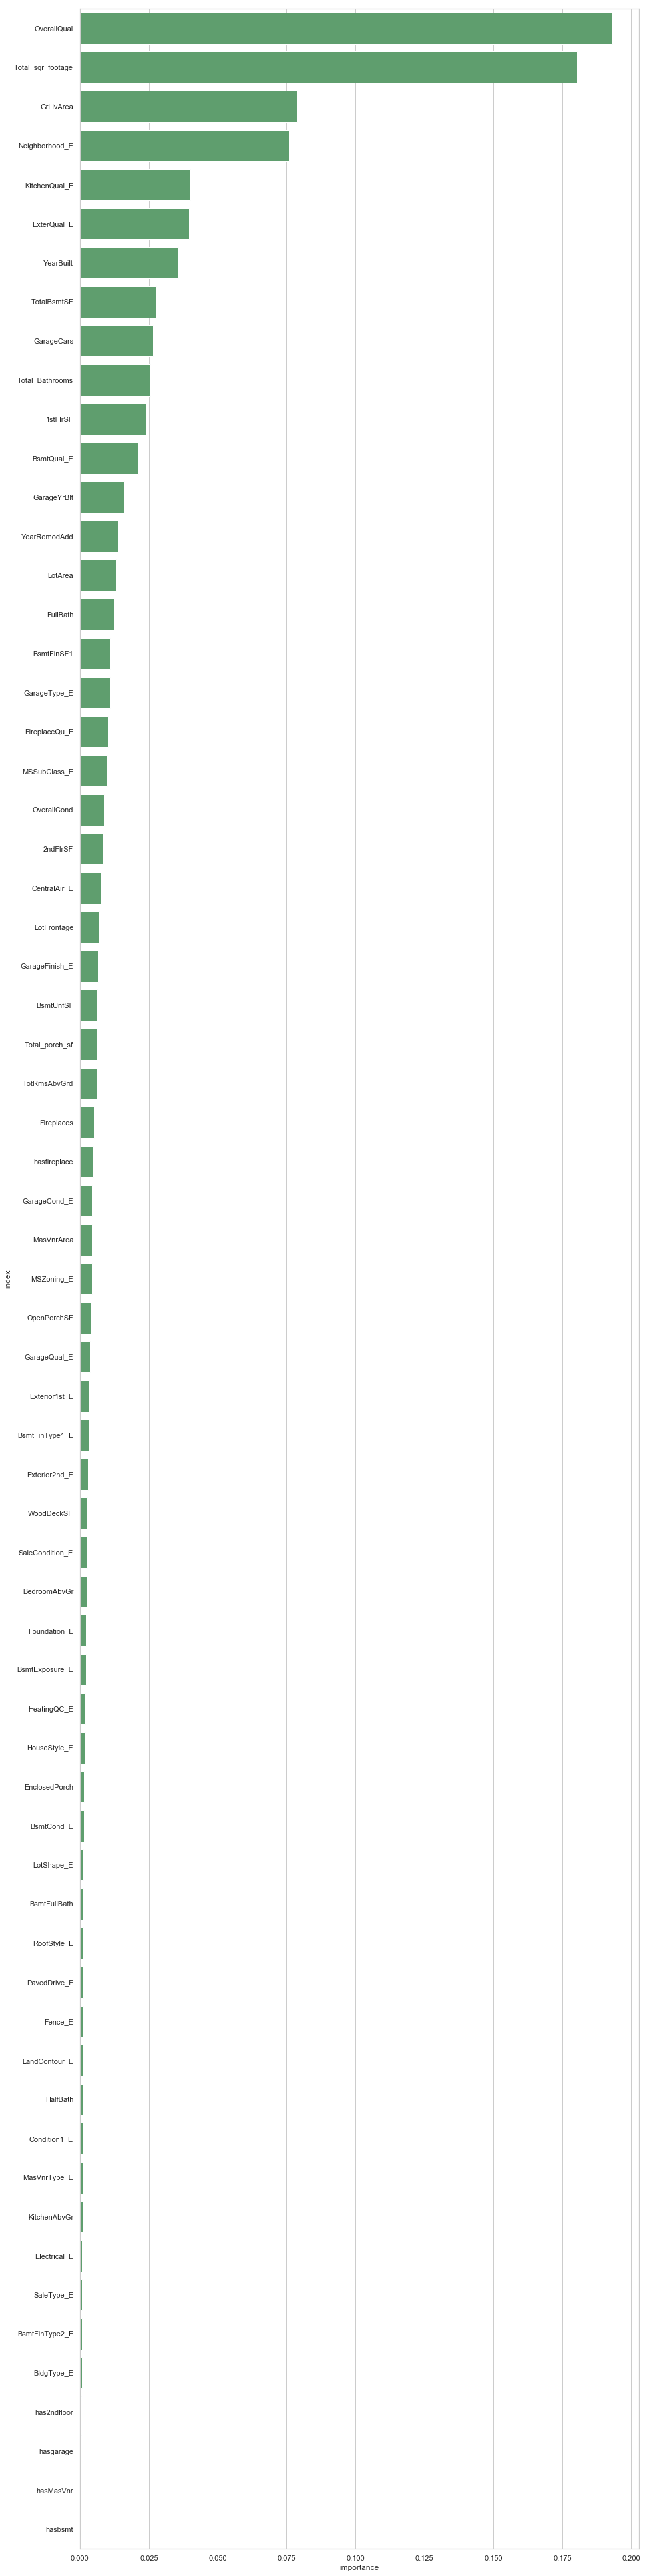

In [76]:
# Barplot for the feature importance
sns.set(style='whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 70))

# Plot the Feature Importance
sns.barplot(x='importance', y='index', data=feature_importances, label='Total', color='g')

<a id = 'averageing'></a>
# Averaging Base Models
***
Creating a class which will perform mean of predictions made by several base models.

In [77]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

Based on RMSLE error scores, I am considering Elastic Net Regression, Lasso Regression, GBoost Regression, XGB Regression, LGBM Regression models for averaging.

In [78]:
averaged_models = AveragingModels(models = (ENet, lasso_reg, GBoost, model_xgb, model_lgb))

score = rmsle_cv(averaged_models, train[quantitative+qual_encoded], y_train)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1098 (0.0052)



Apparently, averaging our base models have improved the RMSLE scores to some extent. So, we will prepare file for a submission using averaged_models.

In [79]:
averaged_models.fit(train[quantitative+qual_encoded], y_train)
averaged_pred = np.expm1(averaged_models.predict(test[quantitative+qual_encoded]))
test_ID = test['Id']
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = averaged_pred

# first submission file
sub.to_csv('../submissions/submission_averaged.csv',index=False)

<a id = 'stacking'></a>
# Stacked Generalization
***
Stacking is based on a simple idea: instead of using trivial functions (such as mean) to aggregate the predictions of all predictors in an ensemble, why don’t we train a model to perform this aggregation?

### Following are the steps performed in training a Stacked Generalization Model or Stacking:
***
1. Split the training data in two subsets: subset 1 (i.e., train) and subset 2 (i.e., holdout).
2. Train base models using the subset 1 (i.e., train set).
<br>
<img src="../images/image1.png"></img>
<br>In our case, I considered five base models - Elastic Net Regressor, Lasso Regressor, Gradient Boost Regressor, XG Boost Regressor, and LGBM Regressor, and trained them using the train set.
3. Make predictions of the data in subset 2 (i.e., holdout set) using each base model.
4. Capture the predictions of all the base models and store/blend them in a single dataframe (let us name it "out_of_fold_predictions" dataframe)
5. Train a new model using the "out_of_fold_predictions" dataframe as its features and the actual prices of holdout set as the target variable. This new model is called "blender" model or "meta" model (because it blends the predictions of all the base model).
<br>
<img src="../images/image2.png"></img>

### Following are the steps performed to make predictions using Stacked Generalization Model or Stacking:
***
1. Make predictions for test data using each base models.
2. Capture the predictions made by each base model and store/blend them in a single dataframe. This single dataframe is called "meta features", because we will input this data to "meta"/blender model.
3. The meta model takes the "meta features" as input and makes predictions.

In [80]:
class StackedGeneralization(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            # train each base models
            for train_index, holdout_index in kfold.split(X, y):
                model.fit(X[train_index], y[train_index])
                y_pred = model.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        
        # Now train the meta-model/blender using the out-of-fold predictions as new feature
        self.meta_model.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use their predictions as 
    #meta-features for the final prediction which is done by the meta-model/blender
    def predict(self, X):
        meta_features = np.zeros((X.shape[0], len(self.base_models)))
        
        # make predictions using all base models
        for i, model in enumerate(self.base_models):
            y_pred = model.predict(X)
            meta_features[:, i] = y_pred
        
        return self.meta_model.predict(meta_features)

In [81]:
stacked_generalization = StackedGeneralization(base_models = (ENet, lasso_reg, GBoost, model_xgb, model_lgb),
                                               meta_model = Lasso(alpha=0.00005))
score = rmsle_cv(stacked_generalization, train[quantitative+qual_encoded].values, y_train.values)

In [82]:
print(" Stacked Generalization models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Stacked Generalization models score: 0.1104 (0.0053)



Wow! Out basic stacked generalization performed better than base models. We could use stacked generalization model for out second submission.

In [83]:
stacked_generalization.fit(train[quantitative+qual_encoded].values, y_train)
stacked_pred = np.expm1(stacked_generalization.predict(test[quantitative+qual_encoded].values))

sub['SalePrice'] = stacked_pred

# second submission file
sub.to_csv('../submissions/submission_stacked.csv',index=False)

Now that we have two submission files, lets make another submission whose prediction would be a mean of AveragingModels and StackedGeneralization.

In [84]:
pred = 0.5 * stacked_pred + 0.5 * averaged_pred
sub['SalePrice'] = pred

# third submission file
sub.to_csv('../submissions/submission_complex.csv',index=False)

<a id = 'conclusion'></a>
# Conclusion
***
In this notebook I successfully did analysis on which features influences the House Prices. I have also come up with few new features that has been used as an input to predictive models.
<br><br>
I have trained several Machine Learning base models to predict House Prices. I have also used techniques like Averaging base models and Stacked Generalization, which has given me much better score to my predictions using test data.